In [ ]:
#import packages
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Sentiment Label Analysis

In [ ]:
#reading the data
df = pd.read_csv("/content/drive/MyDrive/Amazon-Product-Reviews - Amazon Product Review (1).csv")
# first few rows
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,sentiment
0,US,11555559,R1QXC7AHHJBQ3O,B00IKPX4GY,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,Great love it,2015-08-31,1
1,US,31469372,R175VSRV6ZETOP,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,3,0,0,N,N,Lots of ads Slow processing speed Occasionally...,Lots of ads<br />Slow processing speed<br />Oc...,2015-08-31,0
2,US,26843895,R2HRFF78MWGY19,B00IKPW0UA,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Well thought out device,Excellent unit. The versatility of this table...,2015-08-31,1
3,US,19844868,R8Q39WPKYVSTX,B00LCHSHMS,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,4,0,0,N,N,Not all apps/games we were looking forward to ...,I bought this on Amazon Prime so I ended up bu...,2015-08-31,1
4,US,1189852,R3RL4C8YP2ZCJL,B00IKPZ5V6,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,All Amazon products continue to meet my expect...,2015-08-31,1


In [ ]:
#converting 1 and 0 into positive and negative
df['sentiment'] = df['sentiment'].apply(lambda x: 'positive' if x==1 else 'negative')

In [ ]:
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,sentiment
0,US,11555559,R1QXC7AHHJBQ3O,B00IKPX4GY,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,Great love it,2015-08-31,positive
1,US,31469372,R175VSRV6ZETOP,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,3,0,0,N,N,Lots of ads Slow processing speed Occasionally...,Lots of ads<br />Slow processing speed<br />Oc...,2015-08-31,negative
2,US,26843895,R2HRFF78MWGY19,B00IKPW0UA,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Well thought out device,Excellent unit. The versatility of this table...,2015-08-31,positive
3,US,19844868,R8Q39WPKYVSTX,B00LCHSHMS,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,4,0,0,N,N,Not all apps/games we were looking forward to ...,I bought this on Amazon Prime so I ended up bu...,2015-08-31,positive
4,US,1189852,R3RL4C8YP2ZCJL,B00IKPZ5V6,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,All Amazon products continue to meet my expect...,2015-08-31,positive


In [ ]:
# check columns, data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30846 entries, 0 to 30845
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   marketplace        30846 non-null  object
 1   customer_id        30846 non-null  int64 
 2   review_id          30846 non-null  object
 3   product_id         30846 non-null  object
 4   product_parent     30846 non-null  int64 
 5   product_title      30846 non-null  object
 6   product_category   30846 non-null  object
 7   star_rating        30846 non-null  int64 
 8   helpful_votes      30846 non-null  int64 
 9   total_votes        30846 non-null  int64 
 10  vine               30846 non-null  object
 11  verified_purchase  30846 non-null  object
 12  review_headline    30844 non-null  object
 13  review_body        30842 non-null  object
 14  review_date        30846 non-null  object
 15  sentiment          30846 non-null  object
dtypes: int64(5), object(11)
memory usage: 3.

In [ ]:
print(df.isnull().sum())

marketplace          0
customer_id          0
review_id            0
product_id           0
product_parent       0
product_title        0
product_category     0
star_rating          0
helpful_votes        0
total_votes          0
vine                 0
verified_purchase    0
review_headline      2
review_body          4
review_date          0
sentiment            0
dtype: int64


In [ ]:
#removing the spaces
df.columns = df.columns.str.replace(' ', '_')

In [ ]:
# Remove rows where review_body is NaN or an empty string
df = df[df['review_body'].notna() & (df['review_body'].str.strip() != '')]
df = df[df['review_headline'].notna() & (df['review_headline'].str.strip() != '')]


In [ ]:
print(df.isnull().sum())

marketplace          0
customer_id          0
review_id            0
product_id           0
product_parent       0
product_title        0
product_category     0
star_rating          0
helpful_votes        0
total_votes          0
vine                 0
verified_purchase    0
review_headline      0
review_body          0
review_date          0
sentiment            0
dtype: int64


In [ ]:
df['sentiment'].unique()

array(['positive', 'negative'], dtype=object)

In [ ]:
# check distribution of labels
df['sentiment'].value_counts()

,count
sentiment,
positive,25763
negative,5077


In [ ]:
df.columns

Index(['marketplace', 'customer_id', 'review_id', 'product_id',
       'product_parent', 'product_title', 'product_category', 'star_rating',
       'helpful_votes', 'total_votes', 'vine', 'verified_purchase',
       'review_headline', 'review_body', 'review_date', 'sentiment'],
      dtype='object')

Sentiment Label Analysis

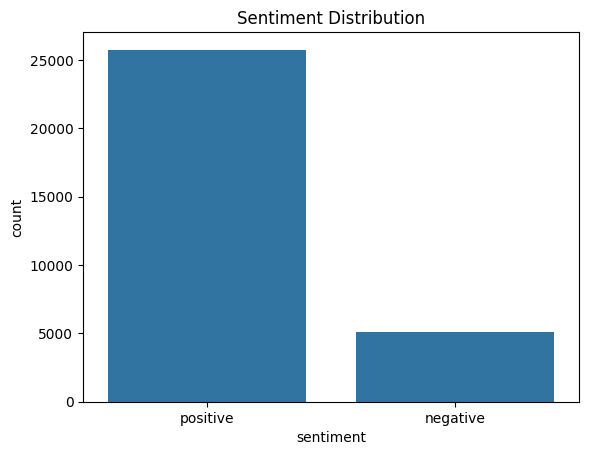

In [ ]:
#bar plot for checking distribution
sns.countplot(x='sentiment', data=df)
plt.title("Sentiment Distribution")
plt.show()

Text Data Exploration

Sample reviews per sentiment:

In [ ]:
for label in df['sentiment'].unique():
    print(f"--- {str(label).upper()} ---")
    print(df[df['sentiment'] == label]['review_body'].sample(3).to_list())

--- POSITIVE ---
['It would be a lot better if it had a slot for extra chip for interchangeable storage.', 'Nice', "Been really enjoying its lightweight frame for reading books, movies, at-night viewing, clarity - it's really been great on-the-go!"]
--- NEGATIVE ---
['first one broke. and this thing is just bad.', 'The kindle fire was a gift to a teenager.', "Virtually no setup/operation instructions came with it requiring one full day to get it working...Skype does not work properly...There is no incoming ring or it is too low to be heard...There seems to be no good source of help except to call Amazon or Skype for this problem..Written explanations for the individual functions and uses are either vague or not available...I'm considering returning the product..."]


Review length stats:

In [ ]:
df['review_length'] = df['review_body'].apply(lambda x: len(str(x).split()))
print(df['review_length'].describe())


count    30840.000000
mean        33.408398
std         62.614709
min          1.000000
25%          6.000000
50%         16.000000
75%         37.000000
max       2353.000000
Name: review_length, dtype: float64


Vocabulary size:

In [ ]:
from collections import Counter
vocab = Counter(" ".join(df['review_body']).split())
print(f"Vocabulary size: {len(vocab)}")


Vocabulary size: 44055


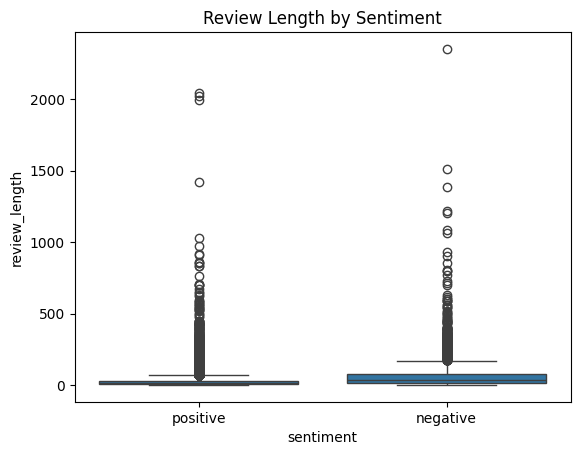

In [ ]:
df['review_length'] = df['review_body'].fillna('').apply(lambda x: len(x.split()))
sns.boxplot(x='sentiment', y= 'review_length', data = df)
plt.title("Review Length by Sentiment")
plt.show()

Text Preprocessing

In [ ]:
#performing the preprocessing and creating a new column and storing the cleaned data in the new column
# initialize stop words and stemmer
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean_text(text):
    #lowercase
    text = text.lower()

    #remove numbers and special characters
    text = re.sub(r'[^a-z\s]', '', text)

    #tokenize
    tokens = text.split()

    #remove stop words
    tokens = [word for word in tokens if word not in stop_words]

    #apply stemming
    stemmed = [stemmer.stem(word) for word in tokens]

    return ' '.join(stemmed)
df['Cleaned_review'] = df['review_body'].apply(clean_text)


Visualize Preprocessed Text

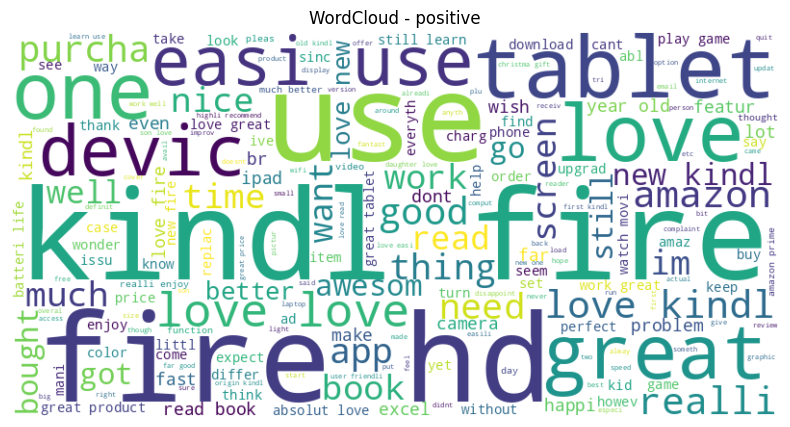

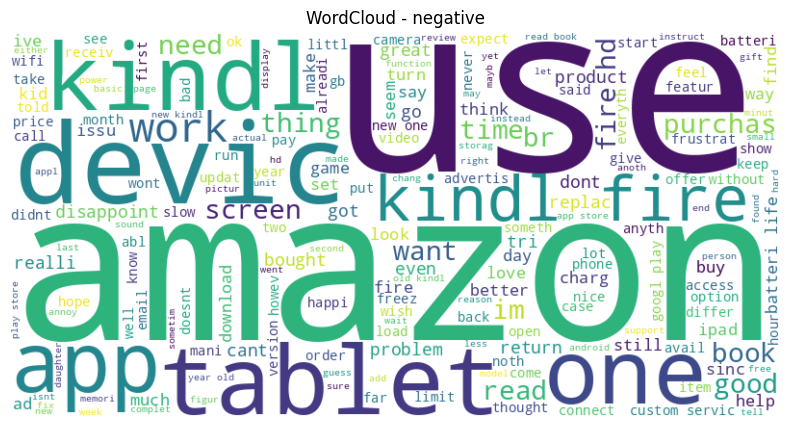

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for label in df['sentiment'].unique():
    text_data = " ".join(df[df['sentiment'] == label]['Cleaned_review'])
    wc = WordCloud(width=800, height=400, background_color='white').generate(text_data)

    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud - {label}")
    plt.show()

In [ ]:
#train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.Cleaned_review, df.sentiment, test_size=0.2, random_state=42)

#find the word count and store them as a matrix
cv = CountVectorizer()
X_train_count = cv.fit_transform(X_train.values)


Naive Bayes Model

Accuracy score: 0.8951037613488976
Precision score: 0.9182799702159344
Recall score: 0.9595409453413732
F1 score: 0.9384571482925901
classification_report:               precision    recall  f1-score   support

    negative       0.74      0.57      0.65      1027
    positive       0.92      0.96      0.94      5141

    accuracy                           0.90      6168
   macro avg       0.83      0.77      0.79      6168
weighted avg       0.89      0.90      0.89      6168

confusion_matrix [[ 588  439]
 [ 208 4933]]


Text(45.722222222222214, 0.5, 'Actual')

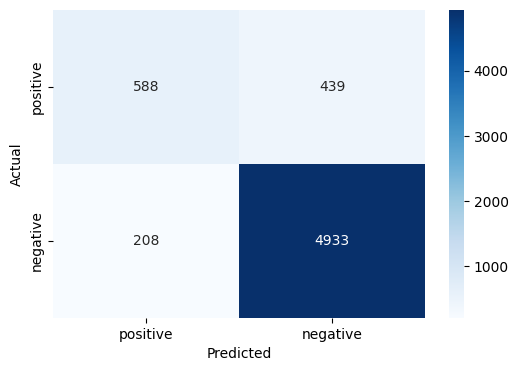

In [ ]:
#selecting and training the Naive Bayes Model
model = MultinomialNB()
model.fit(X_train_count, y_train)

#checking the scores
X_test_count = cv.transform(X_test)

y_pred_nb = model.predict(X_test_count)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print(f"Accuracy score: {accuracy_score(y_test, y_pred_nb)}")
print(f"Precision score: {precision_score(y_test, y_pred_nb, pos_label='positive')}")
print(f"Recall score: {recall_score(y_test, y_pred_nb, pos_label='positive')}")
print(f"F1 score: {f1_score(y_test, y_pred_nb, pos_label='positive')}")
print(f"classification_report: {classification_report(y_test, y_pred_nb)}")


#confusion_matrix
print(f"confusion_matrix {confusion_matrix(y_test,y_pred_nb)}")

#heatmap for the confusion_matrix with CountVectorizer
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,y_pred_nb), annot=True, fmt='d', cmap='Blues', xticklabels=['positive', 'negative'], yticklabels=['positive', 'negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')

logistic regression

In [ ]:
#using logistic regression
logistic_model= LogisticRegression()
logistic_model.fit(X_train_count, y_train)


LogisticRegression()

Accuracy score: 0.8964007782101168
Precision score: 0.9170062986291219
Recall score: 0.9628476950009726
F1 score: 0.9393680614859095


Text(45.722222222222214, 0.5, 'Actual')

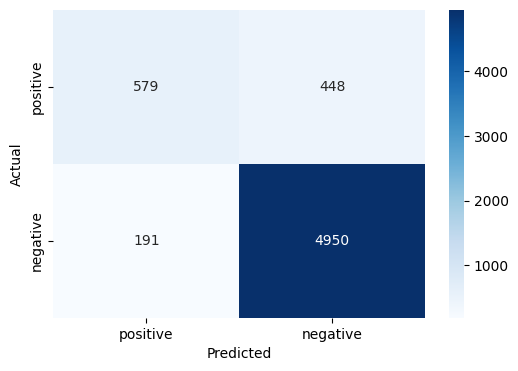

In [ ]:
#checking the scores
X_test_count = cv.transform(X_test)
y_pred_lr = logistic_model.predict(X_test_count)

#scores
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print(f"Accuracy score: {accuracy_score(y_test, y_pred_lr)}")
print(f"Precision score: {precision_score(y_test, y_pred_lr, pos_label='positive')}")
print(f"Recall score: {recall_score(y_test, y_pred_lr, pos_label='positive')}")
print(f"F1 score: {f1_score(y_test, y_pred_lr, pos_label='positive')}")
print(f"classification_report: {classification_report(y_test, y_pred_lr)}")


#heatmap for the confusion_matrix with CountVectorizer
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,y_pred_lr), annot=True, fmt='d', cmap='Blues', xticklabels=['positive', 'negative'], yticklabels=['positive', 'negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')

SVM model

In [ ]:
from sklearn.svm import LinearSVC

svm_model = LinearSVC(max_iter=5000)  # increase iterations if needed
svm_model.fit(X_train_count, y_train)



LinearSVC(max_iter=5000)

Accuracy score: 0.8899156939040207
Precision score: 0.9166977960403436
Recall score: 0.9546780781949037
F1 score: 0.9353025250119105
classification_report:               precision    recall  f1-score   support

    negative       0.71      0.57      0.63      1027
    positive       0.92      0.95      0.94      5141

    accuracy                           0.89      6168
   macro avg       0.82      0.76      0.78      6168
weighted avg       0.88      0.89      0.88      6168

confusion_matrix [[ 581  446]
 [ 233 4908]]


Text(45.722222222222214, 0.5, 'Actual')

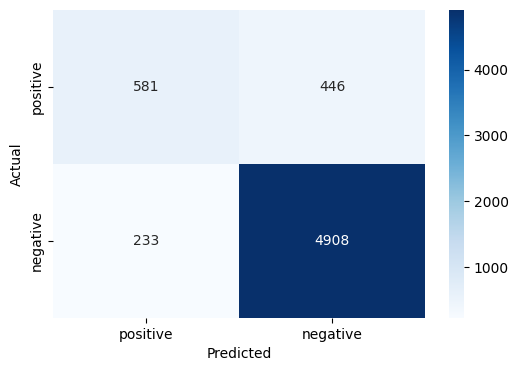

In [ ]:
#checking the scores
X_test_count = cv.transform(X_test)
y_pred_svm = svm_model.predict(X_test_count)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,classification_report

print(f"Accuracy score: {accuracy_score(y_test, y_pred_svm)}")
print(f"Precision score: {precision_score(y_test, y_pred_svm, pos_label='positive')}")
print(f"Recall score: {recall_score(y_test, y_pred_svm, pos_label='positive')}")
print(f"F1 score: {f1_score(y_test, y_pred_svm, pos_label='positive')}")
print(f"classification_report: {classification_report(y_test, y_pred_svm)}")

#confusion_matrix
print(f"confusion_matrix {confusion_matrix(y_test,y_pred_svm)}")

#heatmap for the confusion_matrix with CountVectorizer
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,y_pred_svm), annot=True, fmt='d', cmap='Blues', xticklabels=['positive', 'negative'], yticklabels=['positive', 'negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')

Comparison of ML Models for Sentiment Analysis

In [ ]:
metrics = {
    'Logistic Regression': {'accuracy': 0.8964007782101168, 'precision':0.9170062986291219, 'recall': 0.9628476950009726, 'f1': 0.9393680614859095},
    'SVM': {'accuracy': 0.8899156939040207, 'precision': 0.9166977960403436, 'recall': 0.9546780781949037, 'f1': 0.9353025250119105},
    'Naive Bayes': {'accuracy': 0.8951037613488976, 'precision': 0.9182799702159344, 'recall': 0.9595409453413732, 'f1':0.9384571482925901}
}


In [ ]:
import pandas as pd

df_metrics = pd.DataFrame(metrics).T.reset_index()
df_metrics.rename(columns={'index': 'Model'}, inplace=True)
print(df_metrics)


                 Model  accuracy  precision    recall        f1
0  Logistic Regression  0.896401   0.917006  0.962848  0.939368
1                  SVM  0.889916   0.916698  0.954678  0.935303
2          Naive Bayes  0.895104   0.918280  0.959541  0.938457


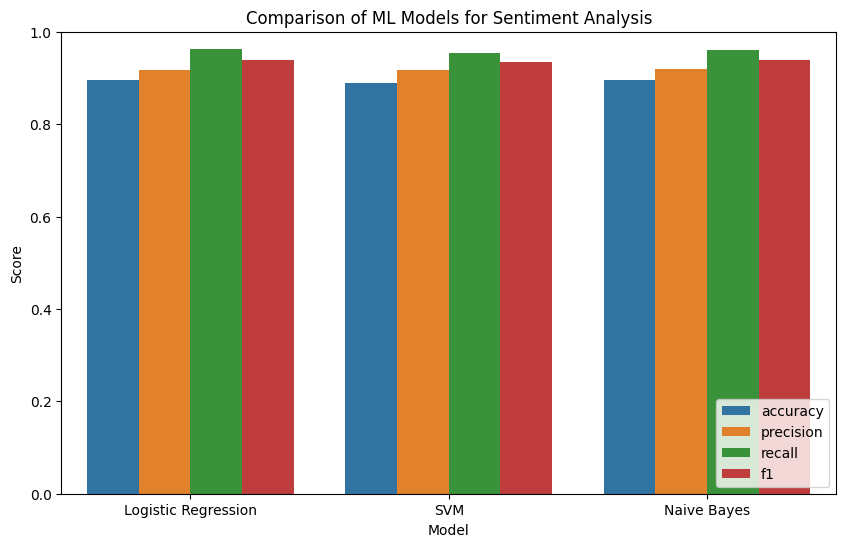

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df_plot = df_metrics.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(10,6))
sns.barplot(x='Model', y='Score', hue='Metric', data=df_plot)
plt.title("Comparison of ML Models for Sentiment Analysis")
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.show()
